### Importacion de librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### Extraer los datos 

In [55]:
df = pd.read_json('../data/MLA_100k.jsonlines', lines=True)

In [56]:
df.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [58]:
df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

### Análisis detallado de la variable objetivo (condition)

In [59]:
print("Distribución de la variable 'condition':")
condition_counts = df['condition'].value_counts(normalize=True)
print(condition_counts)

Distribución de la variable 'condition':
condition
new     0.53758
used    0.46242
Name: proportion, dtype: float64


Observaciones:
- La variable 'condition' indica si un producto es nuevo ('new') o usado ('used').
- Proporción de clases: {'new': 0.53758, 'used': 0.46242}

### Análisis de Valores Faltantes 

In [60]:
missing = df.isnull().sum()
missing_percent = missing / len(df) * 100
missing_df = pd.DataFrame({'Valores Faltantes': missing, 'Porcentaje (%)': missing_percent})
print("Columnas con valores faltantes:")
print(missing_df[missing_df['Valores Faltantes'] > 0])

Columnas con valores faltantes:
                      Valores Faltantes  Porcentaje (%)
warranty                          60896          60.896
seller_contact                    97781          97.781
parent_item_id                    23011          23.011
official_store_id                 99182          99.182
differential_pricing             100000         100.000
original_price                    99857          99.857
video_id                          97015          97.015
catalog_product_id                99989          99.989
subtitle                         100000         100.000


Decisiones sobre valores faltantes:
- Columnas con >90% de valores faltantes (differential_pricing, subtitle, catalog_product_id, original_price, official_store_id): Eliminar.
- warranty (39% no nulos): Imputar con 'No warranty' y crear variable binaria 'has_warranty'. Pero para esto vamos a revisar la variable "Warranty"
- seller_contact, video_id: Eliminar debido a baja completitud (<3%).
- parent_item_id (77% no nulos): Eliminar, ya que no es crítico para predecir 'condition'.

#### Variable Warranty

In [61]:
print(df['warranty'].value_counts())
df['warranty'].nunique()

warranty
Sí                                                                       5682
Sin garantía                                                             5442
SI                                                                        592
6 meses                                                                   547
6 MESES                                                                   397
                                                                         ... 
Garantía de un año a partir de la fecha de entrega!                         1
Garantía 1 año. La misma no incluye daños por mal uso o accidentales.       1
SE PRUEBAN LOS JUEGOS AL RETIRAR                                            1
Mi garantía son los comentarios de mis compradores.                         1
Pueden variar matasellos                                                    1
Name: count, Length: 10264, dtype: int64


10264

Esto confirma que warranty:

- Está llena de texto libre.

- Tiene mucho ruido (textos promocionales, subjetivos, informales).

- No hay una estructura confiable para usarla directamente.

Dado su ruido y ambigüedad, no va a aportar señal clara al modelo y puede hasta introducir error o sobreajuste, por lo que es mejor elminarla. 

### Aplanamiento de Datos Anidados y Características Derivadas

In [62]:
# Extraer número de métodos de pago no-MercadoPago
def extract_num_payment_methods(methods):
    return len(methods) if isinstance(methods, list) else 0

# Extraer flags de envío
def extract_free_shipping(shipping):
    return shipping.get('free_shipping', False)

def extract_local_pick_up(shipping):
    return shipping.get('local_pick_up', False)

def extract_num_pictures(pictures):
    try:
        pics = eval(pictures) if isinstance(pictures, str) and pictures != 'Unknown' else []
        return len(pics) if isinstance(pics, list) else 0
    except:
        return 0

def extract_size(pictures, key):
    if not pictures or not isinstance(pictures, list):
        return None
    
    try:
        size = pictures[0].get(key)
        if size:
            width, height = map(int, size.split('x'))
            return width * height 
        return None
    except ValueError as ve:
        print(f"Value error: {ve}")
        return None
    except Exception as e:
        print(f"Unexpected error when extracting size: {e}")
        return None
    
def calculate_pixels(pictures):
    return extract_size(pictures, 'size')

def calculate_max_pixels(pictures):
    return extract_size(pictures, 'max_size')

def extract_seller_state(address):
    try:
        # Parsear si es string, usar directamente si es dict
        d = ast.literal_eval(address) if isinstance(address, str) else address
        # Extraer state['name']
        return d['state']['name'] if isinstance(d, dict) and 'state' in d and isinstance(d['state'], dict) else 'Unknown'
    except:
        return 'Unknown'


df['pixels'] = df['pictures'].apply(calculate_pixels)
df['max_pixels'] = df['pictures'].apply(calculate_max_pixels)
# Aplicar funciones
df['free_shipping'] = df['shipping'].apply(extract_free_shipping)
df['local_pick_up'] = df['shipping'].apply(extract_local_pick_up)
df['num_payment_methods'] = df['non_mercado_pago_payment_methods'].apply(extract_num_payment_methods)
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['num_pictures'] = df['pictures'].apply(extract_num_pictures)
df['seller_state'] = df['seller_address'].apply(extract_seller_state)


Nuevas características:
- free_shipping, local_pick_up: Extraídas de shipping.
- num_payment_methods: Número de métodos de pago alternativos.
- title_length: Longitud del título.
- num_pictures: Número de imágenes.
- seller_state: De seller_address.
- pixels: Área en píxeles de la primera imagen, usando 'size'.
- max_pixels: Área en píxeles de la primera imagen, usando 'max_size'.


### Manejo de Redundancias y Outliers

In [63]:
# Eliminar initial_quantity, available_quantity y base_price
if 'base_price' in df.columns:
    df = df.drop(columns=['base_price'])
    print("- Eliminado base_price (redundante).")

# Validar price en ARS
min_price_threshold = 10
print(f"- Filtrando precios < {min_price_threshold} ARS (valores irrealmente bajos).")
df = df[df['price'] >= min_price_threshold]

# Manejo de outliers basados en percentil 99
numeric_cols = ['price', 'title_length']
for col in ['price']:
    p99 = df[col].quantile(0.99)
    df = df[df[col] <= p99]
print(f"Número de registros después de eliminar outliers y filtrar precios bajos: {len(df)}")

# Verificar si se eliminaron demasiados datos
if len(df) < 0.9 * 100000:
    print("- Advertencia: Se eliminó más del 10% de los datos. Considerar ajustar percentiles o umbrales.")

- Eliminado base_price (redundante).
- Filtrando precios < 10 ARS (valores irrealmente bajos).
Número de registros después de eliminar outliers y filtrar precios bajos: 98553


### Análisis de Características Numéricas

In [64]:
numeric_cols = ['price', 'sold_quantity', 'num_payment_methods', 'initial_quantity', 'available_quantity']
print("Estadísticas de variables numéricas:")
print(df[numeric_cols].describe())

Estadísticas de variables numéricas:
               price  sold_quantity  num_payment_methods  initial_quantity  \
count   98553.000000   98553.000000         98553.000000      98553.000000   
mean     1901.146064       2.407527             1.600479         35.254259   
std      8759.008825      42.940583             1.410115        422.753125   
min        10.000000       0.000000             0.000000          1.000000   
25%        90.000000       0.000000             0.000000          1.000000   
50%       250.000000       0.000000             2.000000          1.000000   
75%       799.000000       0.000000             3.000000          2.000000   
max    130000.000000    8676.000000            12.000000       9999.000000   

       available_quantity  
count        98553.000000  
mean            35.005753  
std            422.487203  
min              1.000000  
25%              1.000000  
50%              1.000000  
75%              2.000000  
max           9999.000000  


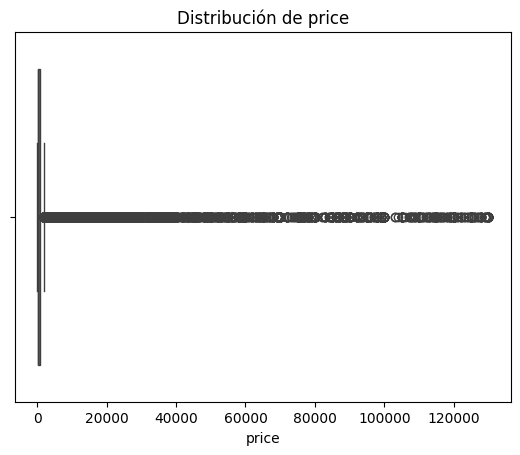

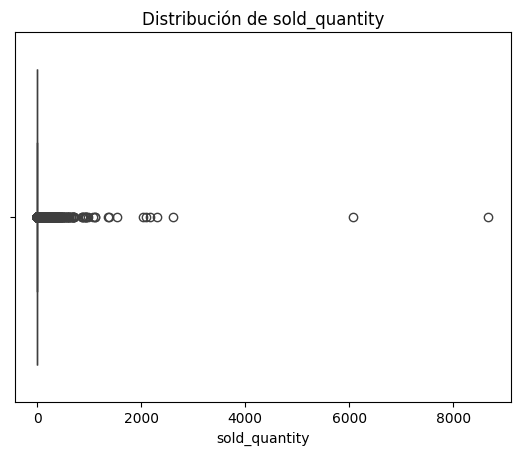

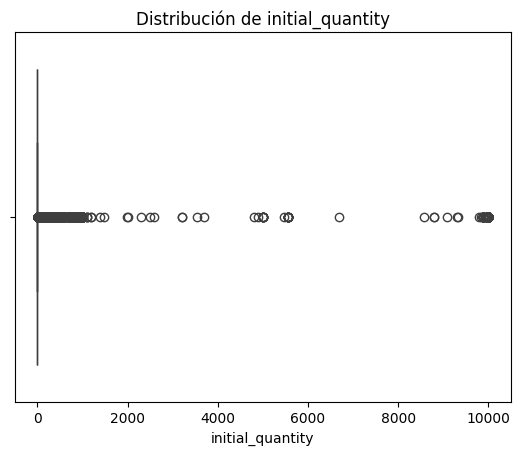

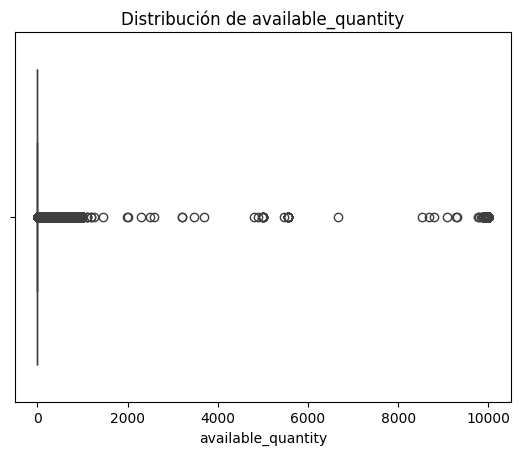

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['price', 'sold_quantity', 'initial_quantity', 'available_quantity']
for col in features_to_plot:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.show()


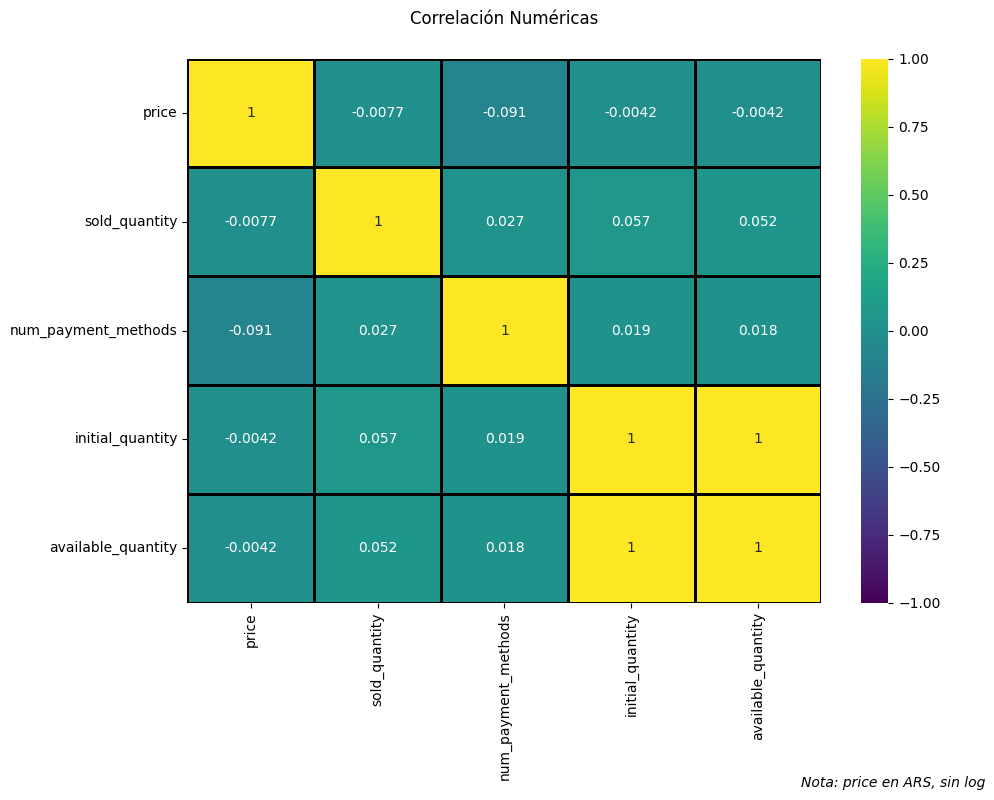

In [66]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=1, linecolor='black')
plt.title('Correlación Numéricas', pad=25)
sns.despine(left=True, bottom=True)
plt.figtext(0.99, 0.01, 'Nota: price en ARS, sin log', 
            ha='right', fontsize=10, style='italic')
plt.tight_layout()


### Análisis Categórico

In [67]:
categorical_cols = ['category_id', 'listing_type_id', 'buying_mode', 'currency_id', 'status', 'seller_state']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nDistribución de {col}:")
        print(df[col].value_counts(normalize=True).head(10))
        if len(df[col].unique()) == 1:
            print(f"- Advertencia: {col} constante. Se eliminará.")



Distribución de category_id:
category_id
MLA1227     0.046554
MLA2044     0.019786
MLA41287    0.009457
MLA3530     0.007326
MLA2038     0.006748
MLA15171    0.005875
MLA15328    0.004830
MLA1383     0.004566
MLA41269    0.004495
MLA15204    0.004414
Name: proportion, dtype: float64

Distribución de listing_type_id:
listing_type_id
bronze          0.637900
free            0.214879
silver          0.086329
gold_special    0.030633
gold            0.023114
gold_premium    0.006961
gold_pro        0.000183
Name: proportion, dtype: float64

Distribución de buying_mode:
buying_mode
buy_it_now    0.979625
classified    0.012846
auction       0.007529
Name: proportion, dtype: float64

Distribución de currency_id:
currency_id
ARS    0.996702
USD    0.003298
Name: proportion, dtype: float64

Distribución de status:
status
active            0.956917
paused            0.042891
closed            0.000183
not_yet_active    0.000010
Name: proportion, dtype: float64

Distribución de seller_state:
se

In [68]:

# Eliminamos las filas donde 'status' sea 'closed' o 'not_yet_active'
df = df[~df['status'].isin(['closed', 'not_yet_active'])]



### Analisís booleano

In [69]:
boolean_cols = ['accepts_mercadopago', 'automatic_relist', 'free_shipping', 'local_pick_up']
for col in boolean_cols:
    if col in df.columns:
        print(f"\nDistribución de {col}:")
        print(df[col].value_counts(normalize=True))
        if len(df[col].unique()) == 1:
            print(f"- Advertencia: {col} constante. Se eliminará.")


Distribución de accepts_mercadopago:
accepts_mercadopago
True     0.987152
False    0.012848
Name: proportion, dtype: float64

Distribución de automatic_relist:
automatic_relist
False    0.952524
True     0.047476
Name: proportion, dtype: float64

Distribución de free_shipping:
free_shipping
False    0.969422
True     0.030578
Name: proportion, dtype: float64

Distribución de local_pick_up:
local_pick_up
True     0.803195
False    0.196805
Name: proportion, dtype: float64


### Transformaciones

#### Eliminar columnas

In [70]:
columns_to_drop = [
    'id', 'permalink', 'thumbnail', 'secure_thumbnail', 'descriptions', 'listing_source',
    'international_delivery_mode', 'last_updated', 'differential_pricing',
    'subtitle', 'catalog_product_id', 'original_price', 'official_store_id',
    'seller_contact', 'video_id', 'seller_address', 'shipping', 'non_mercado_pago_payment_methods',
    'attributes', 'variations', 'deal_ids', 'sub_status', 'coverage_areas', 'geolocation',
    'parent_item_id', 'pictures', 'tags', 'location', 'date_created', 'start_time', 'stop_time',
    'warranty', 'seller_id', 'site_id', 'currency_id', 'accepts_mercadopago', 'category_id'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
print("Columnas eliminadas:", columns_to_drop)



Columnas eliminadas: ['id', 'permalink', 'thumbnail', 'secure_thumbnail', 'descriptions', 'listing_source', 'international_delivery_mode', 'last_updated', 'differential_pricing', 'subtitle', 'catalog_product_id', 'original_price', 'official_store_id', 'seller_contact', 'video_id', 'seller_address', 'shipping', 'non_mercado_pago_payment_methods', 'attributes', 'variations', 'deal_ids', 'sub_status', 'coverage_areas', 'geolocation', 'parent_item_id', 'pictures', 'tags', 'location', 'date_created', 'start_time', 'stop_time', 'warranty', 'seller_id', 'site_id', 'currency_id', 'accepts_mercadopago', 'category_id']


In [71]:
df.columns

Index(['condition', 'listing_type_id', 'price', 'buying_mode', 'title',
       'automatic_relist', 'status', 'initial_quantity', 'sold_quantity',
       'available_quantity', 'pixels', 'max_pixels', 'free_shipping',
       'local_pick_up', 'num_payment_methods', 'title_length', 'num_pictures',
       'seller_state'],
      dtype='object')

In [72]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(98534, 18)
(97985, 18)


In [73]:
df = df.drop(columns=["title"])

#### Codificar categóricas con One-Hot Encoding

In [74]:
categorical_cols = ['listing_type_id', 'buying_mode', 'status', 'seller_state']
# Filtramos solo las columnas que existen en el DataFrame
columns_to_encode = [col for col in categorical_cols if col in df.columns]

# Usamos get_dummies con los prefijos correctamente asignados
df = pd.get_dummies(df, columns=columns_to_encode, 
                    prefix=[f'listing_{col}' if col == 'listing_type_id' else 
                            f'buying_{col}' if col == 'buying_mode' else 
                            f'status_{col}' if col == 'status' else 
                            f'state_{col}' for col in columns_to_encode])

print("Categóricas codificadas con One-Hot Encoding:", columns_to_encode)


Categóricas codificadas con One-Hot Encoding: ['listing_type_id', 'buying_mode', 'status', 'seller_state']


#### Codificar booleanas

In [75]:
# Identificar todas las columnas booleanas
boolean_cols = df.select_dtypes(include='bool').columns.tolist()

# Convertirlas a enteros (0 y 1)
df[boolean_cols] = df[boolean_cols].astype(int)

print("Booleanas codificadas a enteros (1/0):", boolean_cols)


Booleanas codificadas a enteros (1/0): ['automatic_relist', 'free_shipping', 'local_pick_up', 'listing_listing_type_id_bronze', 'listing_listing_type_id_free', 'listing_listing_type_id_gold', 'listing_listing_type_id_gold_premium', 'listing_listing_type_id_gold_pro', 'listing_listing_type_id_gold_special', 'listing_listing_type_id_silver', 'buying_buying_mode_auction', 'buying_buying_mode_buy_it_now', 'buying_buying_mode_classified', 'status_status_active', 'status_status_paused', 'state_seller_state_', 'state_seller_state_Buenos Aires', 'state_seller_state_Capital Federal', 'state_seller_state_Catamarca', 'state_seller_state_Chaco', 'state_seller_state_Chubut', 'state_seller_state_Corrientes', 'state_seller_state_Córdoba', 'state_seller_state_Entre Ríos', 'state_seller_state_Formosa', 'state_seller_state_Jujuy', 'state_seller_state_La Pampa', 'state_seller_state_La Rioja', 'state_seller_state_Mendoza', 'state_seller_state_Misiones', 'state_seller_state_Neuquén', 'state_seller_state_Rí

#### Codificar objetivo

In [76]:
df['condition'] = df['condition'].map({'used': 0, 'new': 1})
print("Objetivo: used=0, new=1.")

Objetivo: used=0, new=1.


#### Verificar el dataset

In [77]:
df.head()

,condition,price,automatic_relist,initial_quantity,sold_quantity,available_quantity,pixels,max_pixels,free_shipping,local_pick_up,...,state_seller_state_Neuquén,state_seller_state_Río Negro,state_seller_state_Salta,state_seller_state_San Juan,state_seller_state_San Luis,state_seller_state_Santa Cruz,state_seller_state_Santa Fe,state_seller_state_Santiago del Estero,state_seller_state_Tierra del Fuego,state_seller_state_Tucumán
0,1,80.0,0,1,0,1,187500.0,1080000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2650.0,0,1,0,1,166666.0,605787.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,60.0,0,1,0,1,187500.0,1080000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,580.0,0,1,0,1,186543.0,186543.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,30.0,0,1,0,1,187500.0,307200.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97985 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   condition                               97985 non-null  int64  
 1   price                                   97985 non-null  float64
 2   automatic_relist                        97985 non-null  int32  
 3   initial_quantity                        97985 non-null  int64  
 4   sold_quantity                           97985 non-null  int64  
 5   available_quantity                      97985 non-null  int64  
 6   pixels                                  97231 non-null  float64
 7   max_pixels                              97181 non-null  float64
 8   free_shipping                           97985 non-null  int32  
 9   local_pick_up                           97985 non-null  int32  
 10  num_payment_methods                     97985 non-null  int64  

In [79]:
df = df.dropna()

In [80]:
df.to_csv('../data/clean_dataset.csv', index=False)
print("\nGuardado en 'data/clean_dataset.csv'")


Guardado en 'data/clean_dataset.csv'
